In [6]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [9]:
df = pd.read_csv(r"data/covid_19_data.csv")
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [10]:
df = df.rename(columns = {'Country/Region':'Country'})
df = df.rename(columns = {'ObservationDate': 'Date'})
df.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             20574 non-null  int64  
 1   Date            20574 non-null  object 
 2   Province/State  10026 non-null  object 
 3   Country         20574 non-null  object 
 4   Last Update     20574 non-null  object 
 5   Confirmed       20574 non-null  float64
 6   Deaths          20574 non-null  float64
 7   Recovered       20574 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.3+ MB


In [11]:
df_countrydate = df[df['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['Date', 'Country']).sum().reset_index()
df_countrydate.head()

,Date,Country,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Japan,36,2.0,0.0,0.0
1,01/22/2020,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,373,547.0,17.0,28.0
3,01/22/2020,South Korea,38,1.0,0.0,0.0
4,01/22/2020,Taiwan,29,1.0,0.0,0.0


### Choropleth Maps

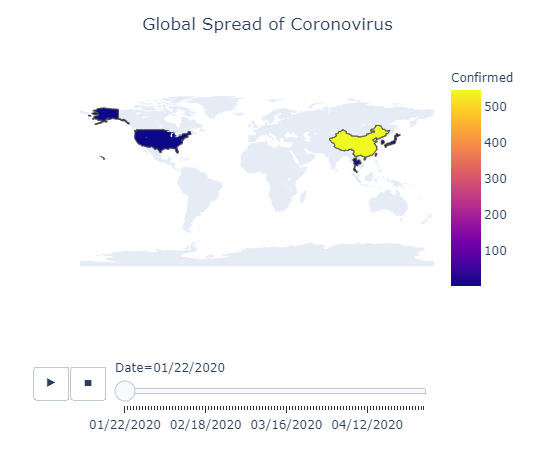

In [12]:
fig = px.choropleth(df_countrydate, 
                    locations='Country', locationmode="country names",
                    color = "Confirmed", hover_name="Country", 
                    animation_frame="Date")
fig.update_layout(title_text = 'Global Spread of Coronovirus',
                  title_x = 0.5,
                  geo = dict(showframe = False, showcoastlines = False))
fig.show()

### Heatmap of Confirmed Cases Globally

In [18]:
df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)

In [20]:
df_countries.Country.value_counts()

US                     101
Thailand               101
Mainland China         101
South Korea            101
Macau                  101
                      ... 
Channel Islands          1
Cape Verde               1
 Azerbaijan              1
Republic of Ireland      1
('St. Martin',)          1
Name: Country, Length: 222, dtype: int64

In [13]:
df_countries = df_countries.drop_duplicates(subset=['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]
df_countries.head()

,Country,Date,SNo,Confirmed,Deaths,Recovered
2491,Cyprus,05/01/2020,20293,857.0,15.0,296.0
4179,Haiti,05/01/2020,20322,85.0,8.0,10.0
9702,Sudan,05/01/2020,20408,533.0,36.0,46.0
4085,Guinea-Bissau,05/01/2020,20320,257.0,1.0,19.0
7273,Netherlands,05/01/2020,102262,39989.0,4909.0,138.0


In [14]:
df_countries.Country.value_counts()

Diamond Princess    1
Hong Kong           1
Latvia              1
Curacao             1
Egypt               1
                   ..
Nicaragua           1
Moldova             1
Zambia              1
Hungary             1
Ghana               1
Name: Country, Length: 213, dtype: int64

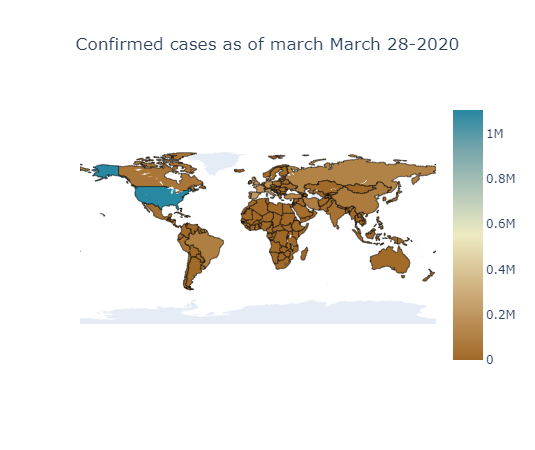

In [20]:
fig = go.Figure(data = go.Choropleth(locations=df_countries['Country'],
                                    locationmode='country names',
                                    z= df_countries['Confirmed'],
                                    colorscale='earth',
                                    marker_line_color = 'black',
                                    marker_line_width = 0.5))

fig.update_layout(title='Confirmed cases as of march March 28-2020',
                 title_x = 0.5,
                 geo=dict(showframe = False,
                          showcoastlines = False,
                          projection_type = 'equirectangular'))
fig.show()

### Heatmap of Confirmed Cases Globally excluding China

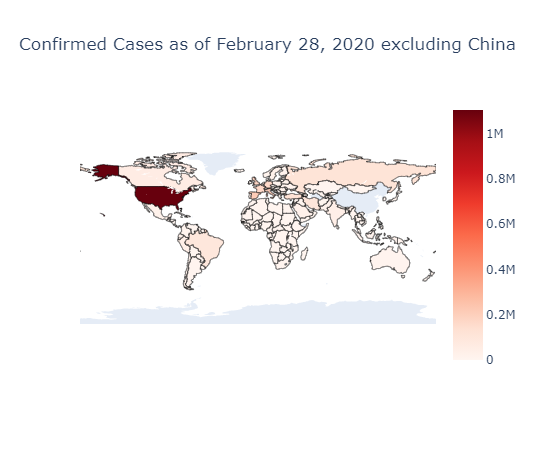

In [22]:
df_countries_no_china = df_countries[df_countries['Country'] != 'Mainland China']
fig = go.Figure(data=go.Choropleth(locations = df_countries_no_china['Country'],
                                   locationmode = 'country names',
                                   z = df_countries_no_china['Confirmed'],
                                   colorscale = 'Reds',
                                   marker_line_color = 'black',
                                   marker_line_width = 0.5))

fig.update_layout(title_text = 'Confirmed Cases as of February 28, 2020 excluding China',
                  title_x = 0.5,
                  geo=dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))

### Pie Charts

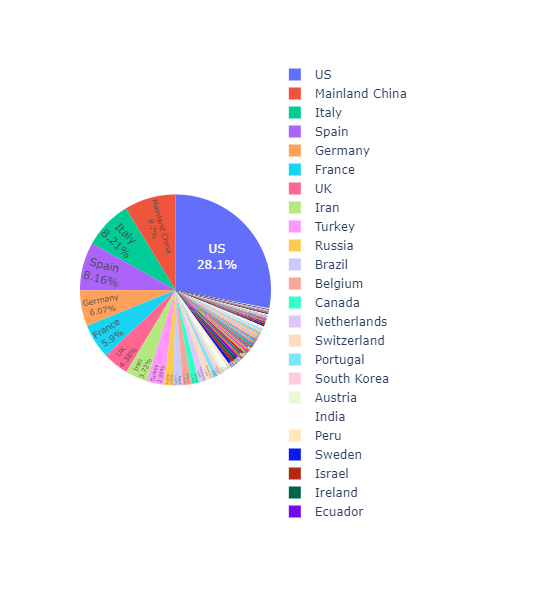

In [27]:
fig = px.pie(df_countrydate, values='Confirmed', names='Country', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label',)
fig.update_layout(title_x=0.5, geo=dict(showframe=False, showcoastlines=False))
fig.show()

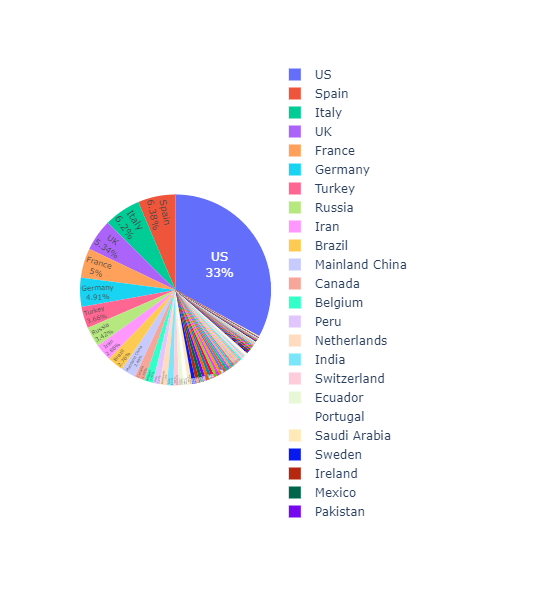

In [28]:
fig = px.pie(df_countries, values='Confirmed', names='Country', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label',)
fig.update_layout(title_x=0.5, geo=dict(showframe=False, showcoastlines=False))
fig.show()

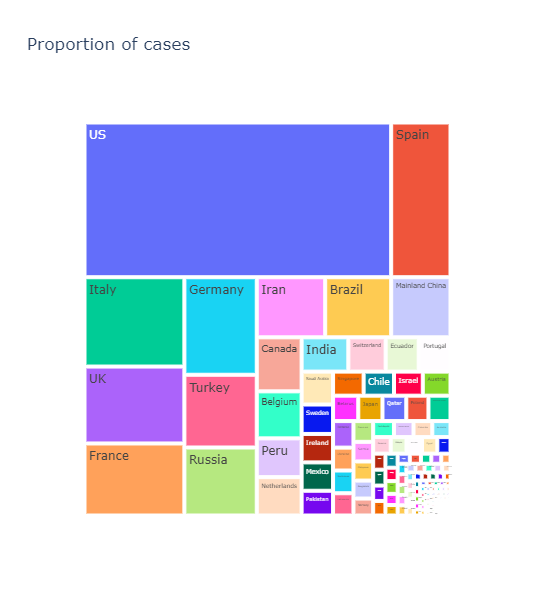

In [21]:


fig = px.treemap(df_countries, 
                 path=['Country'],
                 values = 'Confirmed',
                 names='Country',
                 height=600,
                 title='Proportion of cases',
                )

fig.show()

